In [5]:
import matplotlib.pyplot as plt
from dask import dataframe as dd
from utils import utils
import pandas as pd
import numpy as np
import os

PROVAS = ["NU_NOTA_CN","NU_NOTA_CH","NU_NOTA_MT","NU_NOTA_LC","NU_NOTA_REDACAO"]
OUTPUT = os.path.join(os.getcwd(), 'output')
YEARS = ['2019', '2020', '2021']

if not os.path.isdir(OUTPUT):
    os.makedirs(OUTPUT)

df_2019, df_2020, df_2021 = utils.setup()

In [6]:
for i in YEARS:
    with open(os.path.join(OUTPUT, f'describe{i}.txt'), 'w') as file:
        describe_provas = globals()[f'df_{i}'][PROVAS].describe(
                                        percentiles=[.15, .30, .45, .60, .75, .90], 
                                        include=['object', 'float64', 'int64']
                                    ).apply(lambda s: np.round(s, 2))
        output = f"""
    ------------------------------------------------------------------------
    DESCRIÇÃO DA AMOSTRA

    {describe_provas}
    ------------------------------------------------------------------------
    """
        file.write(output)
        for j in 'ABCDE':
            describe_provas_classe = globals()[f'df_{i}'].query(f"Q006 == '{j}'")[PROVAS].describe(
                                        percentiles=[.15, .25, .30, .45, .60, .75, .90], 
                                        include=['object', 'float64', 'int64']
                                    ).apply(lambda s: np.round(s, 2))

            output = f"""
    ------------------------------------------------------------------------
    DESCRIÇÃO DA AMOSTRA SOBRE A CLASSE {j}

    {describe_provas_classe}
    ------------------------------------------------------------------------
    """
            file.write(output)
        file.close()

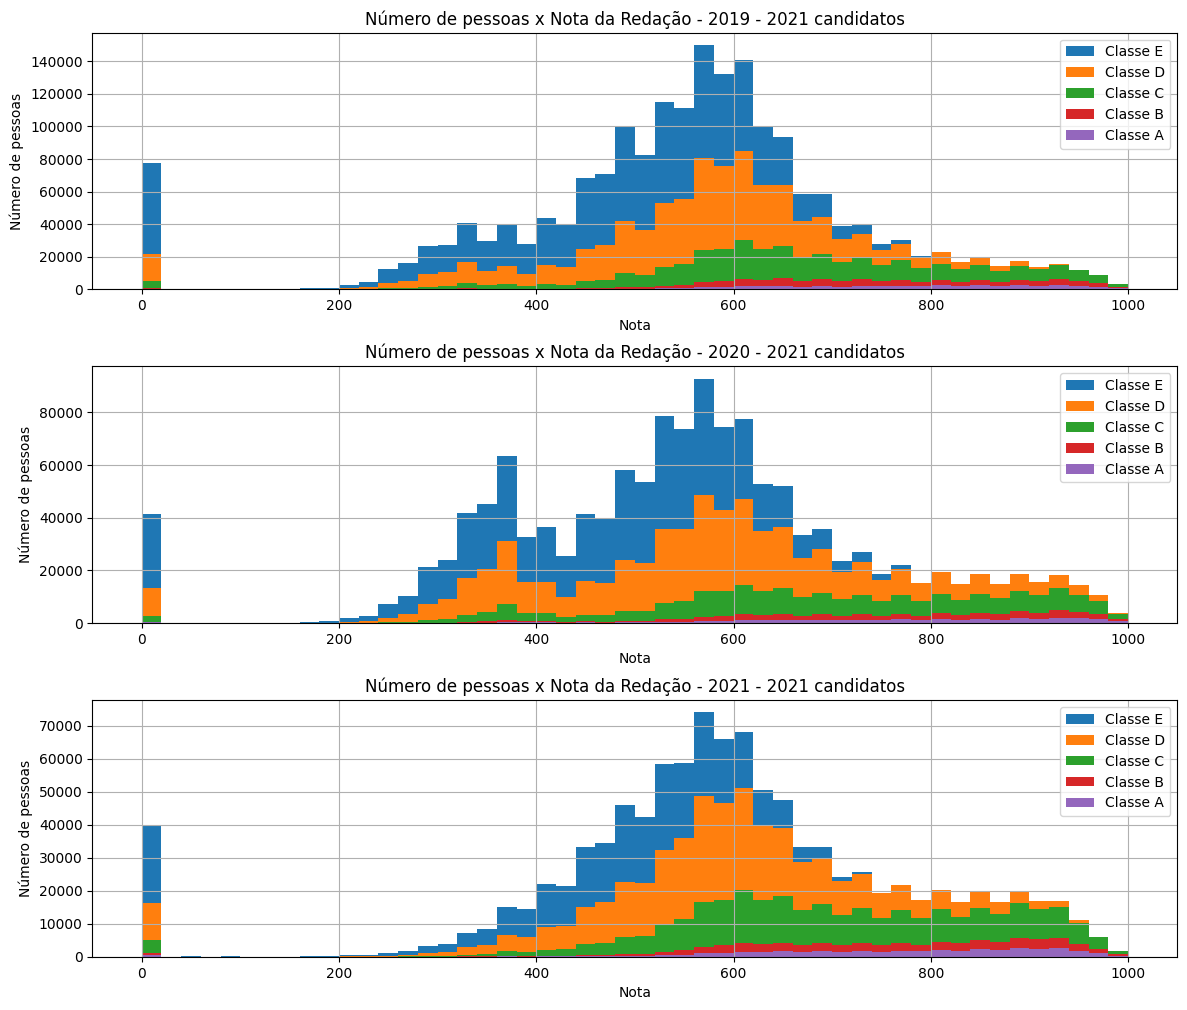

In [7]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(14, 12))

for index, value in enumerate(YEARS):
    globals()[f'df_{value}'].query("Q006 == 'E'")[['NU_NOTA_REDACAO']].hist(
        bins=50, ax=globals()[f'ax{index + 1}'], label="Classe E")
    globals()[f'df_{value}'].query("Q006 == 'D'")[['NU_NOTA_REDACAO']].hist(
        bins=50, ax=globals()[f'ax{index + 1}'], label="Classe D")
    globals()[f'df_{value}'].query("Q006 == 'C'")[['NU_NOTA_REDACAO']].hist(
        bins=50, ax=globals()[f'ax{index + 1}'], label="Classe C")
    globals()[f'df_{value}'].query("Q006 == 'B'")[['NU_NOTA_REDACAO']].hist(
        bins=50, ax=globals()[f'ax{index + 1}'], label="Classe B")
    globals()[f'df_{value}'].query("Q006 == 'A'")[['NU_NOTA_REDACAO']].hist(
        bins=50, ax=globals()[f'ax{index + 1}'], label="Classe A")
    
    n_candidatos = globals()[f'df_{i}'][['NU_ANO']].iloc[0][0]
    globals()[f'ax{index + 1}'].set_title(
        f'Número de pessoas x Nota da Redação - {value} - {n_candidatos} candidatos')
    globals()[f'ax{index + 1}'].set_ylabel('Número de pessoas')
    globals()[f'ax{index + 1}'].set_xlabel('Nota')
    globals()[f'ax{index + 1}'].legend()

fig.savefig(os.path.join(OUTPUT, 'all_classes_by_year.jpg'))

In [ ]:
for i in YEARS:
    fig, [[ax1, ax2], [ax3, ax4], [ax5, _]] = plt.subplots(3, 2, 
                                                               figsize=(14, 11), 
                                                               #constrained_layout=True
                                                              )
    for index, value in enumerate(['E', 'D', 'C', 'B', 'A']):
        
        color = ""
        if value == 'E':
            color = "blue"
        elif value == 'D':
            color = 'orange'
        elif value == 'C':
            color  ='green'
        elif value == 'B':
            color = 'red'
        elif value == 'A':
            color = 'purple'
            
        fig.suptitle(f"Número de pessoas x Nota da Redação - {i} - {globals()[f'df_{i}'].shape[0]} candidatos", fontsize=16)
        globals()[f'df_{i}'].query(f"Q006 == '{value}'")[['NU_NOTA_REDACAO']].hist(bins=100, ax=globals()[f'ax{index + 1}'], label=f"Classe {value}", color=color)
        globals()[f'ax{index + 1}'].set_title("Classe {0} - {1} candidatos".format(value, globals()[f'df_{i}'].query(f"Q006 == '{value}'").shape[0]))
        globals()[f'ax{index + 1}'].set_ylabel('Número de pessoas')
        globals()[f'ax{index + 1}'].set_xlabel('Nota')

    fig.savefig(os.path.join(OUTPUT, f'histogram_classes_{i}.jpg'))   

In [ ]:
from utils import utils

utils.make_analisys_image(df_2019, OUTPUT)
utils.make_analisys_image(df_2020, OUTPUT)
utils.make_analisys_image(df_2021, OUTPUT)

In [ ]:
import seaborn as sns

fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 15))

sns.boxplot(x='Q006', y='NU_NOTA_REDACAO', data=df_2019,
            ax=ax1, order=['A', 'B', 'C', 'D', 'E']).set(xlabel='Classe Social', ylabel='Nota')
ax1.set_title("Descrição da amostra - {0}".format(df_2019[['NU_ANO']].iloc[0][0]))
ax1.set_ylabel('Nota')
ax1.set_xlabel('Classe Social')
ax1.yaxis.grid(True)

sns.boxplot(x='Q006', y='NU_NOTA_REDACAO', data=df_2020,
            ax=ax2, order=['A', 'B', 'C', 'D', 'E']).set(xlabel='Classe Social', ylabel='Nota')
ax2.set_title("Descrição da amostra - {0}".format(df_2020[['NU_ANO']].iloc[0][0]))
ax2.set_ylabel('Nota')
ax2.set_xlabel('Classe Social')
ax2.yaxis.grid(True)

sns.boxplot(x='Q006', y='NU_NOTA_REDACAO', data=df_2021,
            ax=ax3, order=['A', 'B', 'C', 'D', 'E']).set(xlabel='Classe Social', ylabel='Nota')
ax3.set_title("Descrição da amostra - {0}".format(df_2021[['NU_ANO']].iloc[0][0]))
ax3.set_ylabel('Nota')
ax3.set_xlabel('Classe Social')
ax3.yaxis.grid(True)

fig.tight_layout(pad=5.0)
fig.savefig(os.path.join(OUTPUT, 'all_classes_by_year_boxplot.jpg'))

In [ ]:
fields= [*PROVAS, 'NU_MEDIA_GERAL']
df_2019[fields].describe(
                    percentiles=[.15, .25, .30, .45, .60, .75, .90], 
                    include=['object', 'float64', 'int64']
                ).apply(lambda s: np.round(s, 2))